<a href="https://colab.research.google.com/github/rahiakela/deep-learning--from-basics-to-practice/blob/23-keras-part-1/5_training_history_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of Training History

### Setup

In [1]:
from keras.datasets import mnist
from keras import backend as Keras_backend
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

import numpy as np

from keras import backend as keras_backend
keras_backend.set_image_data_format('channels_last')

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
from keras import backend as keras_backend
from keras.models import Sequential
from keras.layers import Dense

# load MNIST data and save sizes
(X_train, y_train), (X_test, y_test) = mnist.load_data()

image_height = X_train.shape[1]
image_width = X_train.shape[2]
number_of_pixels = image_height * image_width


# convert to floating-point
X_train = keras_backend.cast_to_floatx(X_train)
X_test = keras_backend.cast_to_floatx(X_test)


# scale data to range [0, 1]
X_train /= 255.0
X_test /= 255.0


# save the original y_train and y_test
original_y_train = y_train
original_y_test = y_test

# replace label data with one-hot encoded versions
number_of_classes = 1 + max(np.append(y_train, y_test)).astype(np.int32)

# encode each list into one-hot arrays of the size we just found
y_train = to_categorical(y_train, num_classes=number_of_classes)
y_test = to_categorical(y_test, num_classes=number_of_classes)

# reshape samples to 2D grid, one line per image
X_train = X_train.reshape([X_train.shape[0], number_of_pixels])
X_test = X_test.reshape([X_test.shape[0], number_of_pixels])

def make_one_hidden_layer_model():

  # create an empty model
  model = Sequential()

  # add a fully-connected hidden layer with #nodes = #pixels
  model.add(Dense(number_of_pixels, activation='relu', input_shape=[number_of_pixels]))

  # add an output layer with softmax activation
  model.add(Dense(number_of_classes, activation='softmax'))

  # compile the model to turn it from specification to code
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

# make the model
one_hidden_layer_model = make_one_hidden_layer_model()  
one_hidden_layer_model.summary()

11493376/11490434 [==============================] - 1s 0us/step





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


### Motivation

We mentioned before that fit() returned some history information
that tells us how the training went. Let’s investigate that now and see
what we can learn.

To gather lots of data, this time we’ll train for 100 epochs, even though
we know the system hits 100% on the training data after just 20 epochs.

The history information is returned by fit(), so we can just assign the
output of that method to a variable.

In [3]:
# call fit() to train the model, and save the history
one_hidden_layer_history = one_hidden_layer_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=256, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/100





 - 6s - loss: 0.3040 - acc: 0.9135 - val_loss: 0.1523 - val_acc: 0.9547
Epoch 2/100
 - 5s - loss: 0.1226 - acc: 0.9651 - val_loss: 0.1052 - val_acc: 0.9687
Epoch 3/100
 - 5s - loss: 0.0796 - acc: 0.9766 - val_loss: 0.0930 - val_acc: 0.9716
Epoch 4/100
 - 5s - loss: 0.0569 - acc: 0.9838 - val_loss: 0.0700 - val_acc: 0.9795
Epoch 5/100
 - 5s - loss: 0.0415 - acc: 0.9883 - val_loss: 0.0632 - val_acc: 0.9807
Epoch 6/100
 - 5s - loss: 0.0317 - acc: 0.9912 - val_loss: 0.0601 - val_acc: 0.9811
Epoch 7/100
 - 5s - loss: 0.0234 - acc: 0.9939 - val_loss: 0.0617 - val_acc: 0.9799
Epoch 8/100
 - 5s - loss: 0.0180 - acc: 0.9960 - val_loss: 0.0646 - val_acc: 0.9804
Epoch 9/100
 - 5s - loss: 0.0138 - acc: 0.9971 - val_loss: 0.0569 - val_acc: 0.9819
Epoch 10/100
 - 5s - loss: 0.0106 - acc: 0.9980 - val_loss: 0.0582 - val_acc: 0.9823
Epoch 1

This contains a bunch of fields that
summarize the training process (like how many epochs it ran for, and
what parameters we used). The field that’s most interesting to us right
now is called history. It’s a Python dictionary object that contains the
accuracy and loss values for both the training and validation sets after
each epoch.

The training accuracies are in this dictionary as a list stored under the
key ′acc′, so we’d get them from one_hidden_layer_history with
one_hidden_layer_history.history[′acc′] (that’s a lot of typing!).
The training loss uses the key ′loss′. Similarly, the validation accuracy
and loss are stored with the keys ′val_acc′ and ′val_loss′.

Plots the accuracy and loss of our training data graphically.

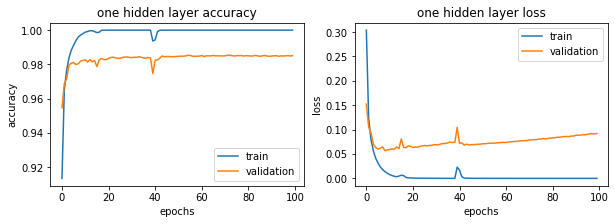

In [4]:
history = one_hidden_layer_history  # a copy with a shorter name
xs = range(len(history.history['acc']))

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.plot(xs, history.history['acc'], label='train')
plt.plot(xs, history.history['val_acc'], label='validation')
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('one hidden layer accuracy')

plt.subplot(1, 2, 2)
plt.plot(xs, history.history['loss'], label='train')
plt.plot(xs, history.history['val_loss'], label='validation')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('one hidden layer loss')

plt.show()

First, it’s worth noting the scales of the data. The accuracy graph begins
at about 0.91 (and tops out at 1.0). That means that after just one epoch
of training, our system was up to 91% accuracy. That’s far from perfect,
but it’s pretty amazing for such a tiny network and one epoch of training.
The loss plot has a correspondingly small range, from 0 to just 0.3.

Both graphs show some spikes. This is probably due to a time when the
samples arrived in just the right order so that some systematic errors
were able to accumulate. The system righted itself nearly immediately
in both cases.

The training loss quickly drops to 0 by about the 20th epoch, and except
for the spikes, it stays there. But the validation loss is slowly increasing.
In other words, **the training loss and validation loss are diverging.
This is a picture of overfitting.**

Learning during overfitting is actually reducing our performance on
the validation data, as the system fruitlessly learns more and more
about the training set, sharpening its rules and memorizing details.
This is a complete waste of effort, and it comes at the expense of losing
generality, with each epoch causing even more harm to the network’s accuracy on new data. Though it doesn’t look like the accuracy is dropping
in these graphs, the increasing validation loss suggests that that
time may come, if we kept on training.

To prevent this overfitting, we might be tempted to stop training where
the loss or accuracy curves cross one another, but this would be too
early. The validation accuracy is still improving, and the validation
loss is still generally dropping. The best place to stop would be when
our validation loss or accuracy stop improving. That is, when the loss
starts to increase or the accuracy starts to drop. Of these two choices,
we usually use increasing loss on the validation set as our trigger to
stop training.


In [5]:
# What's inside the history?
dir(one_hidden_layer_history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [6]:
# What's inside the 'history' field?
dir(one_hidden_layer_history.history)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']